Model of cooling cup


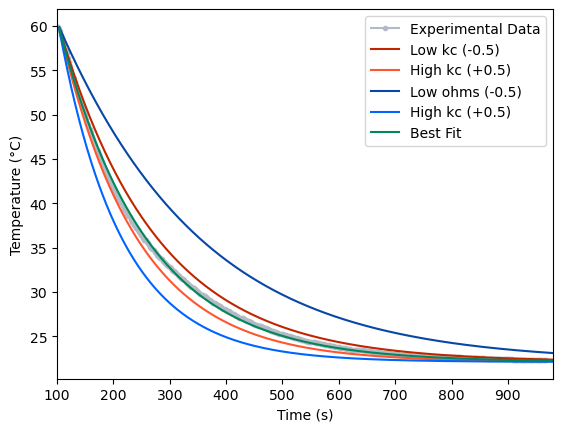

In [25]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Import collected data
file = "Trial 3.csv"
data = np.genfromtxt(file,delimiter=',')
tdata = data[:,0]
ydata = data[:,1]
fig, (ax1) = plt.subplots(1, 1)
# #c0c0c0
ax1.plot(tdata, ydata, marker=".", color="#B3BAC5", label="Experimental Data")

# Rough dimensions of can
pi = 3.142
r = 5.3/2/100  # eff radius
h = 13.3/100  # height
A = 2*(pi*r**2)+h*(2*pi*r)  # exposed surface
V = 250/1000  # volume m^3
rhoair = 1.2  # approx kg/m^3  ROUGH (depends on T)
rhoAl = 2710  # density Al
mair = rhoair*V # kg air
mAl = (11.85/1000) - mair # mass of can kg
d = 0.000127  # rough thickness of Al  [m] *Pulled from Google*
k = 237 # conductivity of Al [W/mK (watts per meter kelvin)]
#print(mair,d)

""" Values below from https://thermtest.com/thermal-resources/materials-database """
cair = 1004 # air J/kg/K
cAl = 921 # Al J/kg/K

heatcap = mAl*cAl + mair*cair

Tcel = 273.15 # to convert C to K
"""" Taken from averaging 100 data points from ambiant arduino in can. """
Tamb = 22.1 + Tcel # ambient temp (K) 
T0 = 60 + Tcel   # starting temperature (From CSV file)

sig = 5.67e-8  # Stefan-Boltzmann W/m^2/K^4

""" Create function to make multiple fits."""

plt.figure

def makefit(eps, kc, colour, name):
    n = 0
    dt = 1 # time step (s)
    tn = 102.91739511489868
    Tn = T0

    t = []
    T = []

    while Tn > Tamb + 0.0001:
        dHc = kc * A * (Tn-Tamb) * dt
        dHr = eps * sig * A * (Tn**4 - Tamb**4) * dt
        Tn = Tn - (dHc + dHr)/heatcap
        tn = tn + dt
        delt = (dHc + dHr)*d/k/A/dt  # temp drop across wall of can - check it is tiny
        # print(delt)
        t.append(tn)     # store the current time
        T.append(Tn-Tcel)     # store the current temperature
        # print(tn,Tn-Tcel)

    plt.plot(t, T, colour, label=name, linewidth=1.5)

# #! Change variables below for fits
# eps = 3    #  emissivity
# kc = 50   # convection coefficient W/m^2/K

"""Colour Codes:
Red: ff595e
Green: 8ac926
Blue: 1982c4
"""


""" Use custom function to create multiple fits """
# for i in np.linspace(4, 15, 5):
#     makefit(eps=0.6666666666666666, kc=i, colour="#ff595e", name="Temperature (C)")
#     print(i)





#? Max/Min Kc Fits (Red)
makefit(eps=0.05, kc=8.35-1, colour="#BF2600", name="Low kc (-0.5)")
makefit(eps=0.05, kc=8.35+1, colour="#FF5630", name="High kc (+0.5)")

#? Max/Min Esp fits (Blue)
makefit(eps=0.05-0.5, kc=8.35, colour="#0747A6", name="Low ohms (-0.5)")
makefit(eps=0.05+0.5, kc=8.35, colour="#0065FF", name="High kc (+0.5)")

#? Best fit
makefit(eps=0.05, kc=8.35, colour="#00875A", name="Best Fit")

plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.xlim(100, 980)             
plt.legend()
plt.show()